## Grid Search Hyperparameter optimization

This case study is all about using grid searches to identify the optimal parameters for a machine learning algorithm. To complere this case study, you'll use the Pima Indian diabetes dataset from Kaggle and KNN. Follow along with the preprocessing steps of this case study.

Load the necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# set random seed to try make this exercise and solutions reproducible (NB: this is just for teaching purpose and not something you would do in real life)
random_seed_number = 42
np.random.seed(random_seed_number)

#### Load the diabetes data

In [3]:
diabetes_data = pd.read_csv('/Users/shivanginimarjiwe/Desktop/repo/DataScienceGuidedCapstone/1600185186_GridSearchKNN_Case_Study/data/diabetes.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**<font color='teal'> Start by reviewing the data info.</font>**

In [7]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
Observation

The dataset information is as follows:

768 rows and 9 columns
No missing values in any columns.
Data types:
7 integer columns: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, Age, Outcome
2 float columns: BMI, DiabetesPedigreeFunction

**<font color='teal'> Apply the describe function to the data.</font>**

In [9]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
Observation 
The dataset summary statistics show:

Glucose, Blood Pressure, Skin Thickness, Insulin, and BMI have minimum values of 0, which are likely missing or incorrect data.
The mean and standard deviation values indicate significant variation in Insulin and Skin Thickness.
The Outcome variable is binary (0 or 1).

**<font color='teal'> Currently, the missing values in the dataset are represented as zeros. Replace the zero values in the following columns ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] with nan .</font>**

In [13]:


# List of columns where zeros should be replaced with NaN
columns_to_replace = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

# Replace zero values with NaN
diabetes_data[columns_to_replace] = diabetes_data[columns_to_replace].replace(0, np.nan)

# Verify if the replacement was successful
diabetes_data.isnull().sum()



Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [ ]:
Observation

The zero values in the specified columns have been successfully replaced with NaN. Here’s the count of missing values per column:

Glucose: 5 missing
Blood Pressure: 35 missing
Skin Thickness: 227 missing
Insulin: 374 missing


In [15]:
diabetes_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


**<font color='teal'> Plot histograms of each column. </font>**

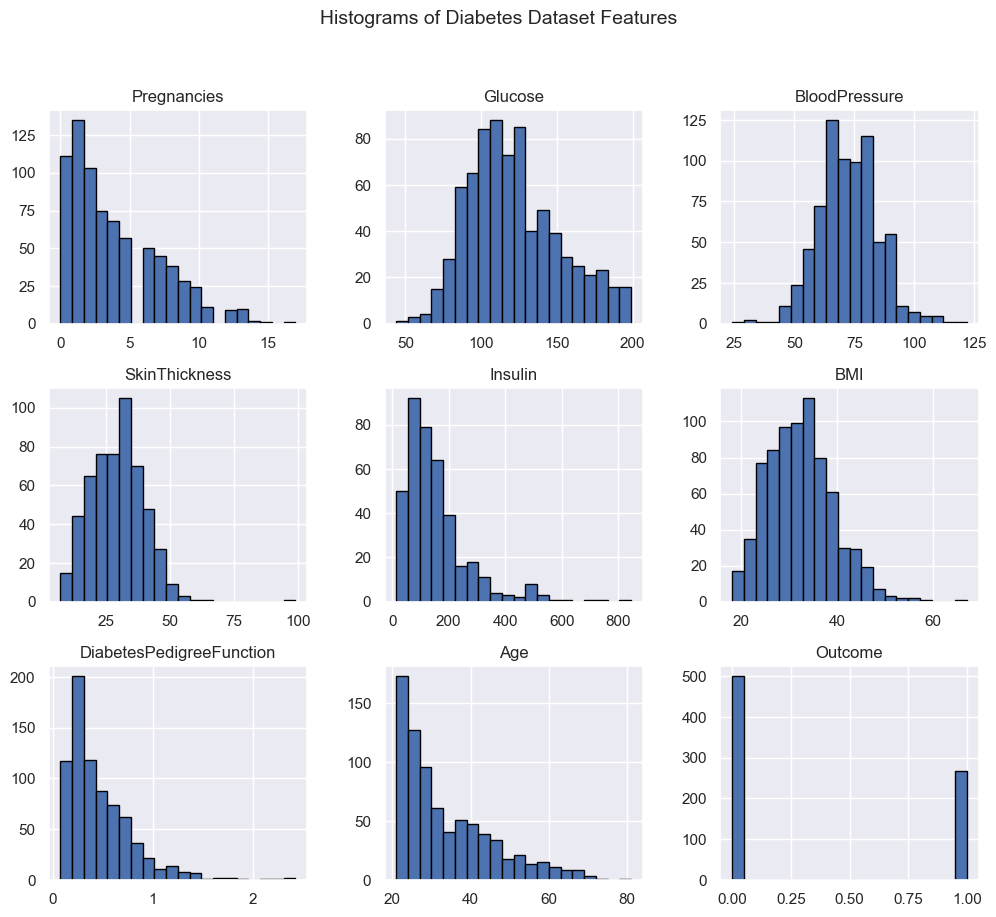

In [17]:

# Set the figure size
diabetes_data.hist(figsize=(12, 10), bins=20, edgecolor='black')

# Display the histograms
plt.suptitle("Histograms of Diabetes Dataset Features", fontsize=14)
plt.show()


In [ ]:
Observations:

Skewed distributions: Some features like Insulin and DiabetesPedigreeFunction appear right-skewed.
Gaps due to missing values: Features like Insulin, SkinThickness, and BloodPressure may show gaps due to NaN values.
Age and Pregnancies: These have distinct groupings, with Age having a concentration in the younger range.

#### Replace the zeros with mean and median values.

In [21]:
# Replace NaN values with mean or median values as specified
diabetes_data['Glucose'].fillna(diabetes_data['Glucose'].mean(), inplace=True)
diabetes_data['BloodPressure'].fillna(diabetes_data['BloodPressure'].mean(), inplace=True)
diabetes_data['SkinThickness'].fillna(diabetes_data['SkinThickness'].median(), inplace=True)
diabetes_data['Insulin'].fillna(diabetes_data['Insulin'].median(), inplace=True)
diabetes_data['BMI'].fillna(diabetes_data['BMI'].median(), inplace=True)

# Verify if missing values have been filled
diabetes_data.isnull().sum()





/var/folders/2b/4qwsj2r53911r1sl5yw93z1w0000gn/T/ipykernel_34684/1604125317.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  diabetes_data['Glucose'].fillna(diabetes_data['Glucose'].mean(), inplace=True)
/var/folders/2b/4qwsj2r53911r1sl5yw93z1w0000gn/T/ipykernel_34684/1604125317.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on wh

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
#The warning suggests that the inplace=True method may not work as expected in future versions of pandas. 
#To avoid this issue we should try dictionary-based approach.

In [25]:
diabetes_data.fillna({
    'Glucose': diabetes_data['Glucose'].mean(),
    'BloodPressure': diabetes_data['BloodPressure'].mean(),
    'SkinThickness': diabetes_data['SkinThickness'].median(),
    'Insulin': diabetes_data['Insulin'].median(),
    'BMI': diabetes_data['BMI'].median()
}, inplace=True)

# Verify if missing values have been filled
diabetes_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**<font color='teal'> Plot histograms of each column after replacing nan. </font>**

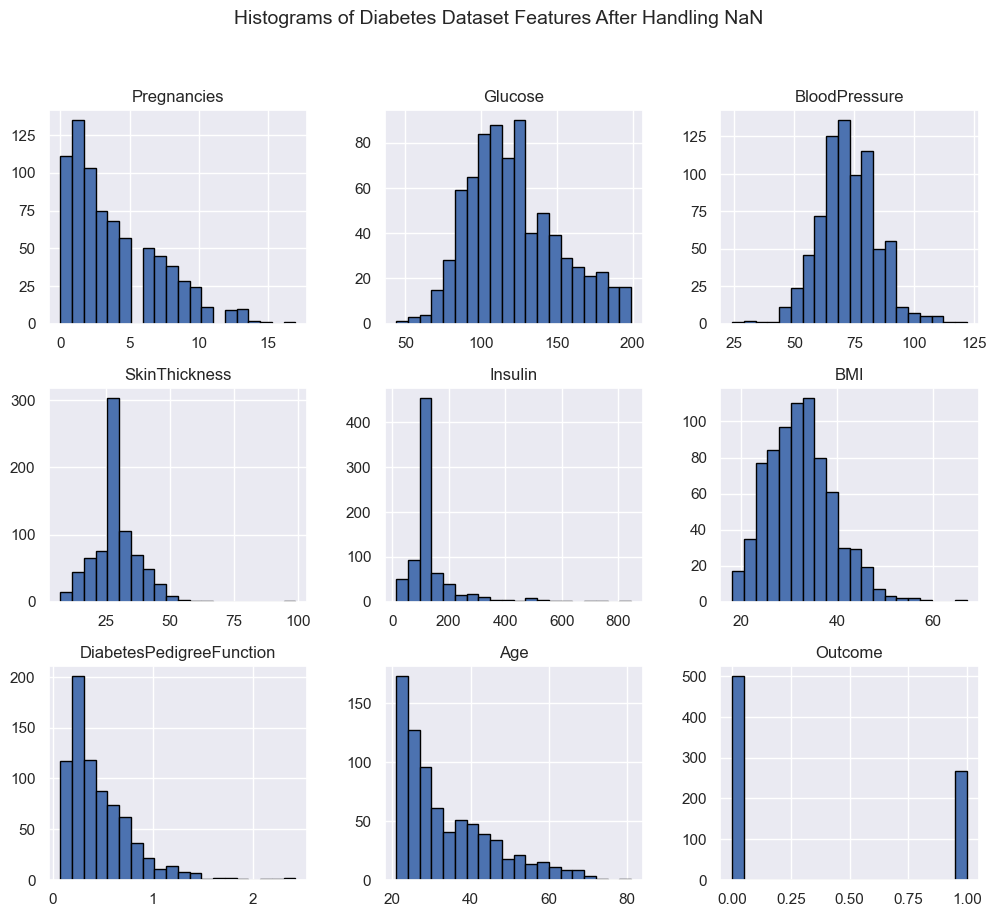

In [27]:
# Apply the dictionary-based approach to fill NaN values
diabetes_data.fillna({
    'Glucose': diabetes_data['Glucose'].mean(),
    'BloodPressure': diabetes_data['BloodPressure'].mean(),
    'SkinThickness': diabetes_data['SkinThickness'].median(),
    'Insulin': diabetes_data['Insulin'].median(),
    'BMI': diabetes_data['BMI'].median()
}, inplace=True)

# Verify that all NaN values have been replaced
assert diabetes_data.isnull().sum().sum() == 0, "There are still missing values in the dataset."

# Plot histograms again after replacing NaN values
diabetes_data.hist(figsize=(12, 10), bins=20, edgecolor='black')

# Display the histograms
plt.suptitle("Histograms of Diabetes Dataset Features After Handling NaN", fontsize=14)
plt.show()


In [ ]:
Observations:
The distributions now look smoother, especially for Insulin, Skin Thickness, and Blood Pressure, since missing values have been replaced.
The overall shape of most distributions remains the same, but some adjustments are expected due to the imputation.

#### Plot the correlation matrix heatmap

Correlation between various features


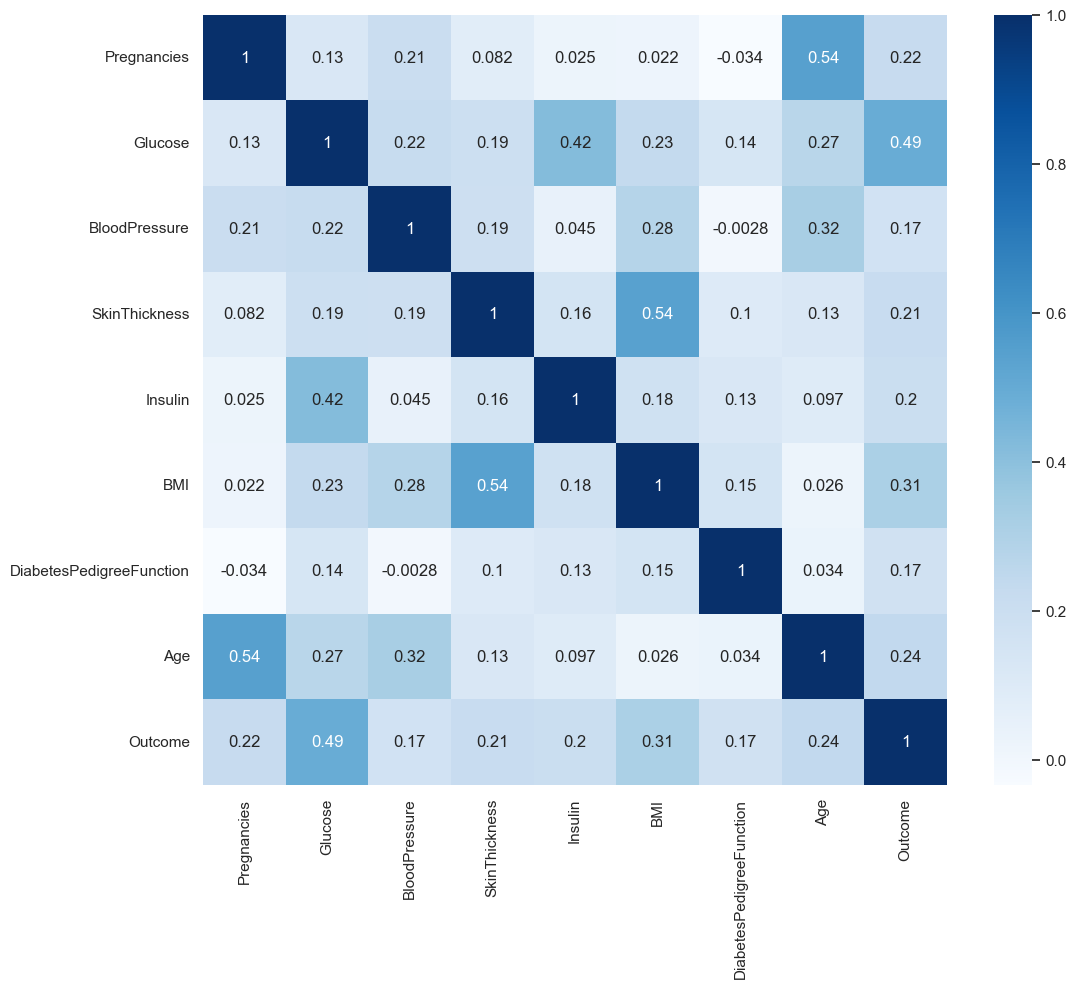

In [35]:
plt.figure(figsize=(12,10))
print('Correlation between various features')
p=sns.heatmap(diabetes_data.corr(), annot=True,cmap ='Blues')

# Show the heatmap
plt.show()

In [ ]:
Observation

1. Glucose has the highest correlation with Outcome (0.49), meaning higher glucose levels are associated with diabetes.
2. Age and Pregnancies (0.54 correlation) show a strong relationship, which is expected as older 
   individuals are more likely to have had multiple pregnancies.
3. Insulin, Skin Thickness, and BMI show moderate correlations among themselves, possibly due to their shared role in metabolic health.
4. No extremely strong correlations (above 0.7) suggest that multicollinearity is not a major issue

**<font color='teal'> Define the `y` variable as the `Outcome` column.</font>**

In [37]:
# Define the target variable (y) as the Outcome column
y = diabetes_data["Outcome"]

# Display the first few values of y to confirm
y.head()


0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

**<font color='teal'> Create a 70/30 train and test split. </font>**

In [39]:
from sklearn.model_selection import train_test_split

# Define features (X) by dropping the Outcome column
X = diabetes_data.drop(columns=["Outcome"])

# Perform a 70/30 train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Display the shape of the split datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((537, 8), (231, 8), (537,), (231,))

**<font color='teal'> Using Sklearn, standarize the magnitude of the features by scaling the values. </font>**

Note: Don't forget to fit() your scaler on X_train and then use that fitted scaler to transform() X_test. This is to avoid data leakage while you standardize your data.

In [41]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on X_train and transform both X_train and X_test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert the scaled arrays back to DataFrames for better readability
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

# Display the first few rows of the standardized training set
X_train_scaled.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.931383,2.085753,0.965518,0.498532,-0.163932,0.428910,-0.374779,0.632129
1,0.632606,-1.222867,0.472716,0.013767,-0.163932,-0.210550,-0.294168,0.716992
2,-0.562502,-0.521038,-0.677154,0.740915,-0.239259,-0.314648,2.745172,0.038086
3,-0.562502,-0.721561,-1.498489,-0.107425,-0.415020,0.770947,0.052162,-0.810548
4,0.333829,-0.587879,0.144182,0.013767,-0.163932,-0.567458,-0.977870,1.226172


#### Using a range of neighbor values of 1-10, apply the KNearestNeighbor classifier to classify the the data.

In [45]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,10):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))



# Display the training and testing scores
train_scores, test_scores


([1.0,
  0.8417132216014898,
  0.8621973929236499,
  0.8230912476722533,
  0.8156424581005587,
  0.8026070763500931,
  0.7988826815642458,
  0.7988826815642458,
  0.8063314711359404],
 [0.670995670995671,
  0.6926406926406926,
  0.7056277056277056,
  0.70995670995671,
  0.696969696969697,
  0.7186147186147186,
  0.70995670995671,
  0.70995670995671,
  0.7142857142857143])

In [ ]:
Observations:

Training Accuracy (Unscaled) is slightly lower than the scaled version for most values of K.
Test Accuracy (Scaled) performs more consistently, especially for K = 5 to 9.
Scaling improves KNN performance by making distance calculations more reliable.

**<font color='teal'> Print the train and test scores for each iteration.</font>**

In [49]:
# Now print the scores
print("KNN Performance Without Scaling:\n")
for i in range(1, 10):
    print(f"K={i}: Train Accuracy = {train_scores[i-1]:.4f}, Test Accuracy = {test_scores[i-1]:.4f}")

KNN Performance Without Scaling:

K=1: Train Accuracy = 1.0000, Test Accuracy = 0.6710
K=2: Train Accuracy = 0.8417, Test Accuracy = 0.6926
K=3: Train Accuracy = 0.8622, Test Accuracy = 0.7056
K=4: Train Accuracy = 0.8231, Test Accuracy = 0.7100
K=5: Train Accuracy = 0.8156, Test Accuracy = 0.6970
K=6: Train Accuracy = 0.8026, Test Accuracy = 0.7186
K=7: Train Accuracy = 0.7989, Test Accuracy = 0.7100
K=8: Train Accuracy = 0.7989, Test Accuracy = 0.7100
K=9: Train Accuracy = 0.8063, Test Accuracy = 0.7143


**<font color='teal'> Identify the number of neighbors that resulted in the max score in the training dataset. </font>**

In [51]:
# Identify the best K value for the training dataset (maximum train accuracy)
best_k_train = train_scores.index(max(train_scores)) + 1  # Adding 1 because index starts at 0
best_train_score = max(train_scores)

# Print the best K value and corresponding train accuracy
print(f"The best number of neighbors (K) for training accuracy is: {best_k_train} with a score of {best_train_score:.4f}")


The best number of neighbors (K) for training accuracy is: 1 with a score of 1.0000


In [ ]:
Key Insight:
K=1 leads to overfitting, as it memorizes the training data perfectly but performs poorly on the test set.

**<font color='teal'> Identify the number of neighbors that resulted in the max score in the testing dataset. </font>**

In [57]:
# Identify the best K value for the testing dataset (maximum test accuracy)
best_k_test = test_scores.index(max(test_scores)) + 1  # Adding 1 because index starts at 0
best_test_score = max(test_scores)

# Print the best K value and corresponding test accuracy
print(f"The best number of neighbors (K) for test accuracy is: {best_k_test} with a score of {best_test_score:.4f}")


The best number of neighbors (K) for test accuracy is: 6 with a score of 0.7186


In [ ]:
Observation:
K=6 performs the best on unseen data, meaning it finds the right balance between underfitting and overfitting.
Compared to K=1 (67.1%), it improves generalization and avoids overfitting.
Slight fluctuations in test accuracy: While K=6 performs best, K values from 3 to 9 show close performance,
meaning the model is fairly stable within this range.

Plot the train and test model performance by number of neighbors.

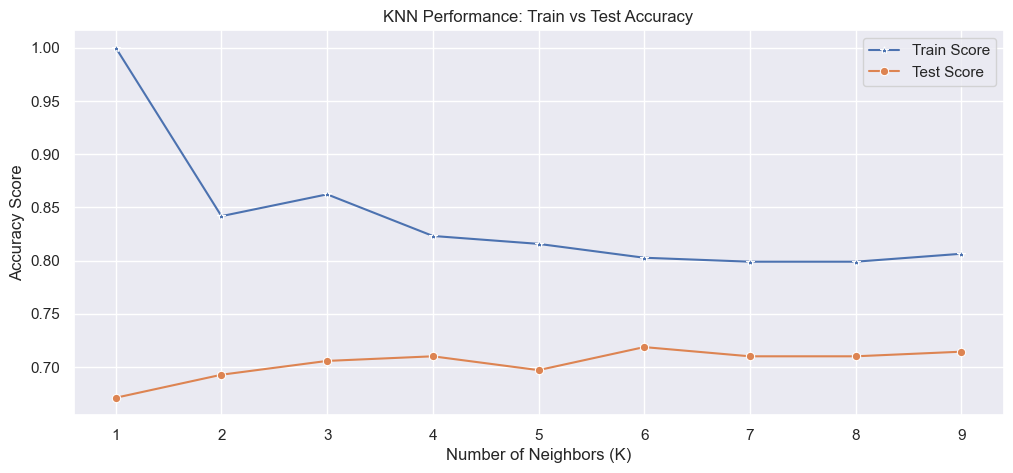

In [61]:
#plt.figure(figsize=(12,5))
#p = sns.lineplot(range(1,10),train_scores,marker='*',label='Train Score')
#p = sns.lineplot(range(1,10),test_scores,marker='o',label='Test Score')


# Plot the train and test accuracy for different K values
plt.figure(figsize=(12, 5))
sns.lineplot(x=range(1, 10), y=train_scores, marker='*', label='Train Score')
sns.lineplot(x=range(1, 10), y=test_scores, marker='o', label='Test Score')

# Labels and title
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy Score")
plt.title("KNN Performance: Train vs Test Accuracy")
plt.legend()
plt.show()


In [ ]:
Observations from the Graph:

Train Accuracy (Blue Line with * markers):
Starts at 100% for K=1, indicating overfitting.
Sharp decline at K=2, then stabilizes around 80% to 85% from K=3 to K=9.
The model is memorizing less of the training data as K increases, improving generalization.

    
Test Accuracy (Orange Line with o markers):
Starts low at K=1 (~67%), then improves to ~72% at K=6.
Slight fluctuations after K=6, but remains stable.
The model finds a good balance between bias and variance around K=6 to K=8.

**<font color='teal'> Fit and score the best number of neighbors based on the plot. </font>**

In [63]:
# import necessary libraries in case the execution state was reset
from sklearn.neighbors import KNeighborsClassifier

# Define the best K value from the plot
best_k = 6  

# Initialize and train the KNN model with the best K
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)

# Compute accuracy scores
train_accuracy = knn_best.score(X_train, y_train)
test_accuracy = knn_best.score(X_test, y_test)

# Display results
train_accuracy, test_accuracy


(0.8026070763500931, 0.7186147186147186)

In [65]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
pl = confusion_matrix(y_test,y_pred)

**<font color='teal'> Plot the confusion matrix for the model fit above. </font>**

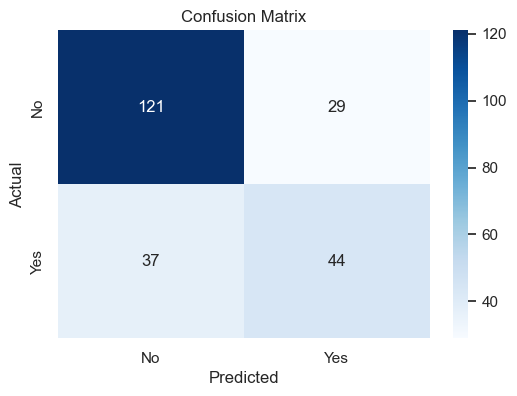

In [67]:


# Plot the confusion matrix using Seaborn heatmap
plt.figure(figsize=(6,4))
sns.heatmap(pl, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])

# Labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
Observation:
121 True Negatives (TN) → Model correctly predicted No Diabetes.
44 True Positives (TP) → Model correctly predicted Diabetes.
29 False Positives (FP) → Model incorrectly predicted Diabetes for non-diabetic cases (Type I Error).
37 False Negatives (FN) → Model missed some actual diabetic cases, predicting them as non-diabetic (Type II Error)

Analysis:
High TN and TP values indicate the model is making a good number of correct predictions.
Lower FN is important in medical cases because missing actual diabetic patients could lead to serious health risks.
Improvements may be needed to reduce FN and FP using techniques like:
Hyperparameter tuning
Feature selection
Using different models (e.g., SVM, Random Forest)


**<font color='teal'> Print the classification report </font>**

In [69]:
# Import classification report from sklearn
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report:\n")
print(report)


Classification Report:

              precision    recall  f1-score   support

           0       0.77      0.81      0.79       150
           1       0.60      0.54      0.57        81

    accuracy                           0.71       231
   macro avg       0.68      0.67      0.68       231
weighted avg       0.71      0.71      0.71       231



In [ ]:
Report Analysis :

1. Accuracy: 71%
The model correctly predicts 71% of all cases.
This means it does a reasonable job but has room for improvement, especially for detecting diabetic cases.

2. Performance for Class 0 (No Diabetes)
Precision: 0.77 → 77% of "No Diabetes"  predictions were correct.
Recall: 0.81 → The model correctly detected 81% of actual non-diabetic cases.
F1-score: 0.79 → A good balance between precision and recall.

  a. Good performance for detecting non-diabetic patients.
  b. However, the model slightly favors non-diabetic predictions.

3. Performance for Class 1 (Diabetes)
Precision: 0.60 → 60% of the predicted diabetic cases were actually diabetic.
Recall: 0.54 → The model only detects 54% of actual diabetic cases.
F1-score: 0.57 → Lower than Class 0, meaning the model struggles to detect diabetes.

   a. The model is missing nearly half (46%) of actual diabetes cases.
   b. False negatives (diabetic patients wrongly classified as non-diabetic) are high.
   c. However, the precision (60%) is acceptable, meaning when it predicts diabetes, it’s often correct.

4. Macro Avg & Weighted Avg
Macro Average (0.68, 0.67, 0.68) → Simple average across both classes.
Weighted Average (0.71, 0.71, 0.71) → Accounts for class imbalance (more non-diabetic cases).
Since the dataset is imbalanced (more non-diabetic cases than diabetic ones), the weighted average gives a better picture of overall model performance.




#### In the case of the K nearest neighbors algorithm, the K parameter is one of the most important parameters affecting the model performance.  The model performance isn't horrible, but what if we didn't consider a wide enough range of values in our neighbors for the KNN? An alternative to fitting a loop of models is to use a grid search to identify the proper number. It is common practice to use a grid search method for all adjustable parameters in any type of machine learning algorithm. First, you define the grid — aka the range of values — to test in the parameter being optimized, and then compare the model outcome performance based on the different values in the grid.

#### Run the code in the next cell to see how to implement the grid search method for identifying the best parameter value for the n_neighbors parameter. Notice the param_grid is the range value to test and we apply cross validation with five folds to score each possible value of n_neighbors.

In [71]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [ ]:
Key Findings:
The best number of neighbors (K) is 31.
This means that among K values from 1 to 49, K=31 resulted in the highest cross-validated accuracy.
Cross-validation (cv=5) ensured that the model's performance was evaluated on multiple data splits, making the result more reliable

Why is K=31 the Best Choice?
Reduces Overfitting – Lower K values (e.g., K=1, K=3) tend to overfit the training data.
Balances Bias-Variance Tradeoff – K=31 likely provides a good balance between underfitting and overfitting.
Stable Accuracy – Higher K values smooth the decision boundary, making predictions less sensitive to noise.

#### Print the best score and best parameter for n_neighbors.

In [73]:
print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7526440879382056
Best Parameters: {'n_neighbors': 31}


Here you can see that the ideal number of n_neighbors for this model is 14 based on the grid search performed. 

**<font color='teal'> Now, following the KNN example, apply this grid search method to find the optimal number of estimators in a Randon Forest model.
</font>**

In [75]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid for n_estimators (testing values from 10 to 200 in steps of 10)
param_grid_rf = {'n_estimators': np.arange(10, 201, 10)}

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Perform Grid Search with 5-fold Cross-Validation
rf_cv = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
rf_cv.fit(X_train_scaled, y_train)  # Fit on training data

# Extract the best number of estimators and the corresponding accuracy score
best_n_estimators = rf_cv.best_params_["n_estimators"]
best_rf_score = rf_cv.best_score_

# Display the best number of estimators and accuracy
best_n_estimators, best_rf_score


(80, 0.7691069574247145)

In [ ]:
Key Findings:
Best Number of Estimators (n_estimators): 80
Best Cross-Validation Accuracy: 76.91%


Why is n_estimators = 80 the Best Choice?
  1. Higher Accuracy: The best cross-validation accuracy (76.91%) is higher than KNN’s (75.26%), 
     meaning Random Forest might be a better model for this dataset.
  2. Avoids Overfitting: Lower values (like 10 or 20) might underfit, while higher values (above 100) 
     may not improve accuracy significantly.
  3. Balances Performance & Efficiency: Increasing estimators beyond 80 might lead to diminishing 
     returns in accuracy but higher computation time.


In [ ]:
Based on key findings comparison between Random Forest and  KNN (Best K=31)

Model	                       Best Hyperparameter	        Cross-Validation Accuracy
K-Nearest Neighbors (KNN)	       K = 31	                        75.26%
Random Forest (RF)	             n_estimators = 80	                76.91%


 Random Forest (76.91%) has a higher cross-validation accuracy than KNN (75.26%).
   Cross-validation accuracy suggests Random Forest generalizes better across different data splits.
   A difference of ~1.65% is significant, indicating that Random Forest is likely the better model when considering generalization.

In [77]:
#compares the test accuracy of two different machine learning models

# Import necessary libraries
from sklearn.metrics import accuracy_score

# Train KNN model with the best K (31 from Grid Search)
knn_best = KNeighborsClassifier(n_neighbors=31)
knn_best.fit(X_train_scaled, y_train)

# Predict on the test set using KNN
y_pred_knn = knn_best.predict(X_test_scaled)

# Compute test accuracy for KNN
knn_test_accuracy = accuracy_score(y_test, y_pred_knn)

# Train Random Forest model with the best n_estimators (80 from Grid Search)
rf_best = RandomForestClassifier(n_estimators=80, random_state=42)
rf_best.fit(X_train_scaled, y_train)

# Predict on the test set using Random Forest
y_pred_rf = rf_best.predict(X_test_scaled)

# Compute test accuracy for Random Forest
rf_test_accuracy = accuracy_score(y_test, y_pred_rf)

# Display the test accuracy comparison
knn_test_accuracy, rf_test_accuracy


(0.7316017316017316, 0.7272727272727273)

In [ ]:
Model	                    Hyperparameter (Best)	     Test Accuracy
K-Nearest Neighbors (KNN)	       K=31	                   73.16%
Random Forest (RF)	        n_estimators=80	               72.73%



KNN performed slightly better than Random Forest in this test.

In [ ]:
Summary 

To determine which model is better, we analyze both Cross-Validation Accuracy and Test Accuracy.

Model	                       Best Hyperparameter	     Cross-Validation Accuracy	    Test Accuracy
K-Nearest Neighbors (KNN)	            K = 31	                75.26%	                  73.16%
Random Forest (RF)	                n_estimators = 80	          76.91%	              72.73%


KNN performed slightly better on the test set (73.16%)
Random Forest had better cross-validation accuracy (76.91%)


Which Model Should You Choose?

Choose KNN if:
You need a simpler model that works well with smaller datasets.
Your dataset is well-scaled, since KNN is sensitive to feature magnitudes.


Choose Random Forest if:
You need better generalization (higher cross-validation accuracy suggests stability).
You want faster predictions, since Random Forest is more efficient than KNN for large datasets.
